# Annotations

Analysis of the different annotations used in flexible docking.

In [2]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

## RMSDs

For flexible docking we have the RMSD of the ligand with respect to the crystallographic position in the cognate structure, but we also have different RMDS for the receptor. In particular we have the pocket similarity RMSD (RMSD between cognate and target crystal structures), the pose RMSD (RMSD between target crystal structure and pose crystal structure) and finally we have the pose/cognate RMSD (RMSD between pose and cognate crystal structure).

### Crystal-Pose RMSD

So far, for the annotation we used the crystal/pose RMSD. It is interesting to know how the different examples are distributed in the ligand vs receptor RMSD space.

In [3]:
df = pd.read_csv("flexcluster_annotated.csv")

In [4]:
df.head()

,pocket,protein,ligand,rank,rmsd,obrmsd,flexobrmsd,fmaxrmsd,score,group,annotation
0,ABL1,1FPU,3QRK,0,1.12474,1.12474,0.75627,1.09286,-11.82862,1,1
1,ABL1,1FPU,3QRK,10,7.46179,7.46179,1.38199,2.77094,-11.55337,1,0
2,ABL1,1FPU,3QRK,11,8.08863,8.08863,1.44861,2.51482,-11.47044,1,0
3,ABL1,1FPU,3QRK,12,8.47072,8.47072,1.60736,2.34249,-11.35890,1,0
4,ABL1,1FPU,3QRK,13,8.45633,8.45633,1.61014,2.35856,-11.32845,1,0


In [9]:
df.loc[df["rank"] != 0]

,pocket,protein,ligand,rank,rmsd,obrmsd,flexobrmsd,fmaxrmsd,score,group,annotation
1,ABL1,1FPU,3QRK,10,7.46179,7.46179,1.38199,2.77094,-11.55337,1,0
2,ABL1,1FPU,3QRK,11,8.08863,8.08863,1.44861,2.51482,-11.47044,1,0
3,ABL1,1FPU,3QRK,12,8.47072,8.47072,1.60736,2.34249,-11.35890,1,0
4,ABL1,1FPU,3QRK,13,8.45633,8.45633,1.61014,2.35856,-11.32845,1,0
5,ABL1,1FPU,3QRK,14,6.79730,6.79730,1.62139,2.81881,-11.30362,1,0
...,...,...,...,...,...,...,...,...,...,...,...
165586,XIAP,5C84,4KMP,5,9.60539,9.60539,1.43189,2.28256,-7.57331,63,0
165587,XIAP,5C84,4KMP,6,8.41238,8.41238,1.30168,2.39061,-7.51172,63,0
165588,XIAP,5C84,4KMP,7,6.88340,6.88340,0.95547,1.40152,-7.40088,63,0
165589,XIAP,5C84,4KMP,8,5.19961,5.19961,2.08915,2.97329,-7.32203,63,0


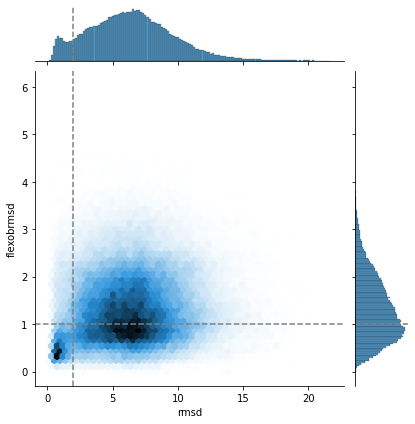

In [5]:
g = sns.jointplot(x="rmsd", y="flexobrmsd", data=df, kind="hex")
g.refline(x=2, y=1)
plt.savefig("plots/RMSD_lig_vs_flex.pdf")
plt.savefig("plots/RMSD_lig_vs_flex.png")

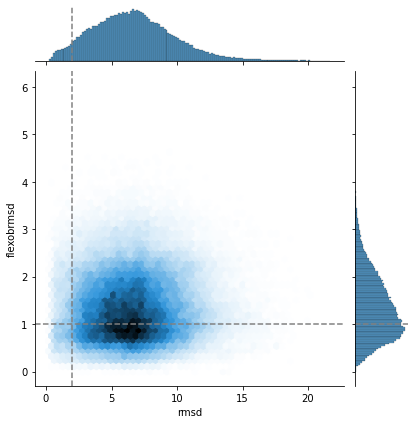

In [11]:
g = sns.jointplot(x="rmsd", y="flexobrmsd", data=df.loc[df["rank"] != 0], kind="hex")
g.refline(x=2, y=1)
plt.savefig("plots/RMSD_lig_vs_flex_nocrystal.pdf")
plt.savefig("plots/RMSD_lig_vs_flex_nocrystal.png")

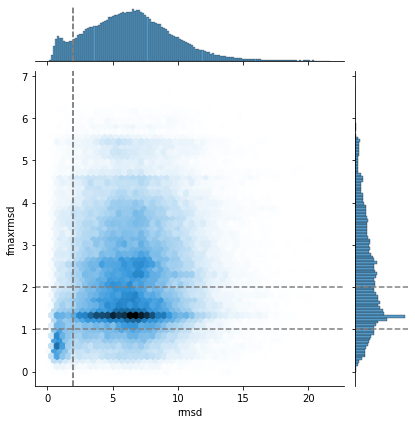

In [5]:
g = sns.jointplot(x="rmsd", y="fmaxrmsd", data=df, kind="hex")
g.refline(x=2, y=1)
g.refline(x=2, y=2)
plt.savefig("plots/RMSD_lig_vs_flexmax.pdf")
plt.savefig("plots/RMSD_lig_vs_flexmax.png")